<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_AT_Seniority_Simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 4.6 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=bae901e1bc06da0d9c935a63d79643f4fe1b90114fdbe9f1931b1b80206c11b8
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import bootstrap, norm

## Data Preprocessing:

In [3]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [4]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")

data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [5]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [6]:
print(data_total['Salary/hour'][data_total['Income EURO']>=10**5])

1858    692.3076923076923
2037    576.9230769230769
2490    692.3076923076923
2499                  750
2538                  750
2559    692.3076923076923
2562    634.6153846153845
2583    576.9230769230769
Name: Salary/hour, dtype: object


In [7]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
# data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_at_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,1,3,1.0,47.0,7.0,Hungary,1.0,2.0,5.0,5.0,...,4.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0
1,1,3,2.0,35.0,NaN,NaN,1.0,2.0,6.0,2.0,...,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0
2,1,3,1.0,51.0,7.0,Australian,3.0,1.0,4.0,5.0,...,4.0,2.0,4.0,5.0,2.0,5.0,3.0,4.0,4.0,4.0
3,1,3,1.0,34.0,7.0,Belgian,2.0,1.0,4.0,7.0,...,2.0,4.0,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0
4,1,3,2.0,29.0,7.0,Ecuadorian,2.0,1.0,4.0,2.0,...,4.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
1324,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
1325,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
1326,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [8]:
data_at_job = data_at_total[['2 Age (in years):',
    'AT_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    # '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    # '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    # '2  gives high priority to job satisfaction', ## KEEP ORDER
    # '3  is good at work planning', ## KEEP ORDER
    # '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # '1 There is a good atmosphere between myself and my colleagues ',
    # '2 There is good co-operation between the colleagues at work',
    # '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [9]:
data_at_job.columns.tolist()

['2 Age (in years):',
 'AT_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, e

In [10]:
data_at_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    # 'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    # 'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # 'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # 'Development_opportunities', ## KEEP ORDER
    # 'Prioritizes_satisfaction', ## KEEP ORDER
    # 'Work_planning', ## KEEP ORDER
    # 'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # 'Good_atmosphere',
    # 'Good_cooperation',
    # 'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [11]:
data_at_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [12]:
data_at_job = data_at_job.dropna(subset=['Age']).reset_index(drop=True)
data_at_job = data_at_job[~(data_at_job == '#VALUE!').any(axis=1)]
for col in data_at_job.columns:
  data_at_job[col] = data_at_job[col].astype(str).str.replace(',', '.').astype(float)
data_at_job.to_csv('data_at_job.csv')
data_at_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,40.0,100.000000,12.0,6.0,6.0,16.0,4.0,...,2.0,2.0,4.0,5.0,2.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,45.0,112.500000,NaN,35.0,10.0,NaN,1.0,...,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,40.0,100.000000,0.0,10.0,10.0,80.0,2.0,...,4.0,5.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,50.0,125.000000,15.0,30.0,2.0,5.0,3.0,...,3.0,2.0,4.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,35.0,100.000000,1.0,20.0,9.0,5.0,1.0,...,3.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,27.0,9.0,18.907500,35.0,116.666667,0.0,25.0,1.0,4.0,2.0,...,4.0,5.0,2.0,2.0,4.0,4.0,4.0,2.0,1.0,2.0
1311,80.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,2.0,2.0,4.0,4.0,2.0,4.0,4.0,4.0,3.0,3.0
1312,27.0,9.0,22.061538,30.0,100.000000,0.0,25.0,0.0,5.0,1.0,...,4.0,2.0,4.0,5.0,1.0,2.0,2.0,4.0,3.0,4.0
1313,28.0,9.0,13.461538,42.0,116.666667,2.0,40.0,0.0,0.0,1.0,...,5.0,4.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0


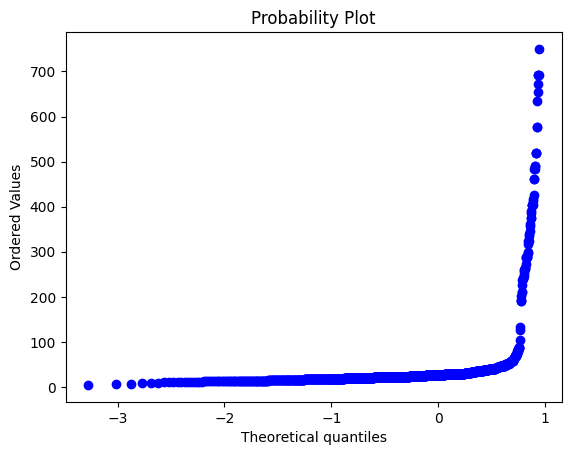

In [13]:
stats.probplot(data_at_job['Salary'], dist="norm", plot=plt)
plt.show()

In [14]:
Q1_salary = data_at_job['Salary'].quantile(0.25)
Q3_salary = data_at_job['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 3. * IQR_salary
upper_bound_salary = Q3_salary + 2.8 * IQR_salary

Q1_hrs = data_at_job['Actual_hrs'].quantile(0.25)
Q3_hrs = data_at_job['Actual_hrs'].quantile(0.75)
IQR_hrs = Q3_hrs - Q1_hrs

lower_bound_hrs = Q1_hrs - 3. * IQR_hrs
upper_bound_hrs = Q3_hrs + 3. * IQR_hrs

Q1_effort = data_at_job['Effort'].quantile(0.25)
Q3_effort = data_at_job['Effort'].quantile(0.75)
IQR_effort = Q3_effort - Q1_effort

lower_bound_effort = Q1_effort - 3. * IQR_effort
upper_bound_effort = Q3_effort + 3. * IQR_effort




data_at_job = data_at_job[(data_at_job['Salary'] > lower_bound_salary) & (data_at_job['Salary'] < upper_bound_salary) &
                          (data_at_job['Actual_hrs'] > lower_bound_hrs) & (data_at_job['Actual_hrs'] < upper_bound_hrs) &
                           (data_at_job['Effort'] > lower_bound_effort) & (data_at_job['Effort'] < upper_bound_effort)].reset_index(drop=True)

data_at_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,35.0,8.0,22.788462,45.0,112.500000,NaN,35.0,10.0,NaN,1.0,...,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0
1,51.0,13.0,20.192308,40.0,100.000000,0.0,10.0,10.0,80.0,2.0,...,4.0,5.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,2.0
2,34.0,8.0,17.884615,50.0,125.000000,15.0,30.0,2.0,5.0,3.0,...,3.0,2.0,4.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0
3,29.0,11.0,26.373626,35.0,100.000000,1.0,20.0,9.0,5.0,1.0,...,3.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0,3.0
4,41.0,10.0,21.923077,40.0,100.000000,35.0,5.0,0.0,5.0,3.0,...,1.0,2.0,3.0,4.0,1.0,3.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,20.0,20.0,NaN,NaN,1.0,...,1.0,2.0,5.0,5.0,1.0,5.0,1.0,5.0,4.0,4.0
942,27.0,9.0,18.907500,35.0,116.666667,0.0,25.0,1.0,4.0,2.0,...,4.0,5.0,2.0,2.0,4.0,4.0,4.0,2.0,1.0,2.0
943,27.0,9.0,22.061538,30.0,100.000000,0.0,25.0,0.0,5.0,1.0,...,4.0,2.0,4.0,5.0,1.0,2.0,2.0,4.0,3.0,4.0
944,28.0,9.0,13.461538,42.0,116.666667,2.0,40.0,0.0,0.0,1.0,...,5.0,4.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0


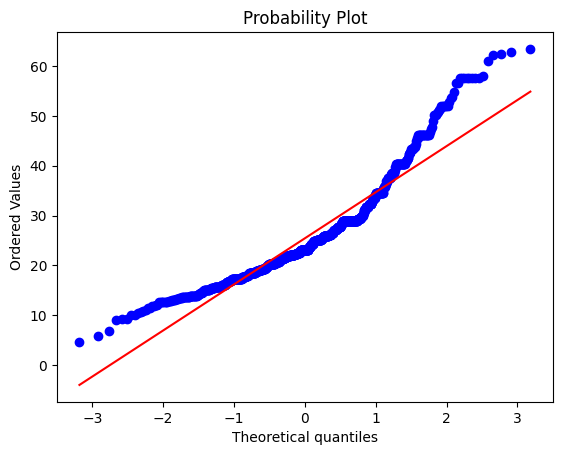

In [15]:
stats.probplot(data_at_job['Salary'], dist="norm", plot=plt)
plt.show()

In [16]:
data_at_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,35.0,8.0,22.788462,45.0,112.500000,NaN,35.0,10.0,NaN,1.0,...,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0
1,51.0,13.0,20.192308,40.0,100.000000,0.0,10.0,10.0,80.0,2.0,...,4.0,5.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,2.0
2,34.0,8.0,17.884615,50.0,125.000000,15.0,30.0,2.0,5.0,3.0,...,3.0,2.0,4.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0
3,29.0,11.0,26.373626,35.0,100.000000,1.0,20.0,9.0,5.0,1.0,...,3.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0,3.0
4,41.0,10.0,21.923077,40.0,100.000000,35.0,5.0,0.0,5.0,3.0,...,1.0,2.0,3.0,4.0,1.0,3.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,20.0,20.0,NaN,NaN,1.0,...,1.0,2.0,5.0,5.0,1.0,5.0,1.0,5.0,4.0,4.0
942,27.0,9.0,18.907500,35.0,116.666667,0.0,25.0,1.0,4.0,2.0,...,4.0,5.0,2.0,2.0,4.0,4.0,4.0,2.0,1.0,2.0
943,27.0,9.0,22.061538,30.0,100.000000,0.0,25.0,0.0,5.0,1.0,...,4.0,2.0,4.0,5.0,1.0,2.0,2.0,4.0,3.0,4.0
944,28.0,9.0,13.461538,42.0,116.666667,2.0,40.0,0.0,0.0,1.0,...,5.0,4.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0


In [17]:
np.sort(data_at_job['Current_position'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [18]:
data_at_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,35.0,8.0,22.788462,45.0,112.500000,NaN,35.0,10.0,NaN,1.0,...,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0
1,51.0,13.0,20.192308,40.0,100.000000,0.0,10.0,10.0,80.0,2.0,...,4.0,5.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,2.0
2,34.0,8.0,17.884615,50.0,125.000000,15.0,30.0,2.0,5.0,3.0,...,3.0,2.0,4.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0
3,29.0,11.0,26.373626,35.0,100.000000,1.0,20.0,9.0,5.0,1.0,...,3.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0,3.0
4,41.0,10.0,21.923077,40.0,100.000000,35.0,5.0,0.0,5.0,3.0,...,1.0,2.0,3.0,4.0,1.0,3.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,20.0,20.0,NaN,NaN,1.0,...,1.0,2.0,5.0,5.0,1.0,5.0,1.0,5.0,4.0,4.0
942,27.0,9.0,18.907500,35.0,116.666667,0.0,25.0,1.0,4.0,2.0,...,4.0,5.0,2.0,2.0,4.0,4.0,4.0,2.0,1.0,2.0
943,27.0,9.0,22.061538,30.0,100.000000,0.0,25.0,0.0,5.0,1.0,...,4.0,2.0,4.0,5.0,1.0,2.0,2.0,4.0,3.0,4.0
944,28.0,9.0,13.461538,42.0,116.666667,2.0,40.0,0.0,0.0,1.0,...,5.0,4.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0


In [19]:
## Interpolating the missing answer data using averages from each job position:
data_at_job_interpolated = data_at_job
data_at_job_interpolated.columns

for i in range(len(data_at_job_interpolated.columns)-3):
  for j in np.sort(data_at_job_interpolated['Current_position'].unique()):
    interpolation = data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][data_at_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
    & (data_at_job_interpolated['Current_position']== j)] = interpolation

data_at_job_interpolated.to_csv('data_at_job_interpolated.csv')
data_at_job_interpolated



Interpolated Value: 20.067036578088498
Interpolated Value: 41.381715958294905
Interpolated Value: 36.06349532820121
Interpolated Value: 29.13871705217858
Interpolated Value: 38.9467032967033
Interpolated Value: 33.58947173516139
Interpolated Value: 32.728575174825174
Interpolated Value: 26.590242448900938
Interpolated Value: 21.2324724750927
Interpolated Value: 25.543949266777176
Interpolated Value: 21.390911119408155
Interpolated Value: 29.87210326941991
Interpolated Value: 21.769152732654753
Interpolated Value: 35.611111111111114
Interpolated Value: 48.14912280701754
Interpolated Value: 41.38235294117647
Interpolated Value: 45.51136363636363
Interpolated Value: 49.333333333333336
Interpolated Value: 46.62068965517241
Interpolated Value: 46.11363636363637
Interpolated Value: 43.1042735042735
Interpolated Value: 39.27717391304348
Interpolated Value: 37.55625
Interpolated Value: 36.42338709677419
Interpolated Value: 25.348837209302324
Interpolated Value: 32.265625
Interpolated Value: 10

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.585858585858586
Interpolated Value: 3.7017543859649122
Interpolated Value: 3.6470588235294117
Interpolated Value: 3.7045454545454546
Interpolated Value: 4.0476190476190474
Interpolated Value: 3.5517241379310347
Interpolated Value: 3.5454545454545454
Interpolated Value: 3.658119658119658
Interpolated Value: 3.572463768115942
Interpolated Value: 3.8365384615384617
Interpolated Value: 3.7661290322580645
Interpolated Value: 4.023255813953488
Interpolated Value: 3.78125
Interpolated Value: 2.595959595959596
Interpolated Value: 2.8421052631578947
Interpolated Value: 2.6470588235294117
Interpolated Value: 2.8181818181818183
Interpolated Value: 2.6666666666666665
Interpolated Value: 3.0344827586206895
Interpolated Value: 3.1818181818181817
Interpolated Value: 2.572649572649573
Interpolated Value: 2.781021897810219
Interpolated Value: 2.3883495145631066
Interpolated Value: 2.4516129032258065
Interpolated Value: 2.302325581395349
Interpolated Value: 2.5625
Interpolated Valu

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,35.0,8.0,22.788462,45.0,112.500000,9.043103,35.0,10.000000,7.025862,1.0,...,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,3.0,3.0
1,51.0,13.0,20.192308,40.0,100.000000,0.000000,10.0,10.000000,80.000000,2.0,...,4.0,5.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,2.0
2,34.0,8.0,17.884615,50.0,125.000000,15.000000,30.0,2.000000,5.000000,3.0,...,3.0,2.0,4.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0
3,29.0,11.0,26.373626,35.0,100.000000,1.000000,20.0,9.000000,5.000000,1.0,...,3.0,4.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0,3.0
4,41.0,10.0,21.923077,40.0,100.000000,35.000000,5.0,0.000000,5.000000,3.0,...,1.0,2.0,3.0,4.0,1.0,3.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,20.000000,20.0,6.452174,6.046610,1.0,...,1.0,2.0,5.0,5.0,1.0,5.0,1.0,5.0,4.0,4.0
942,27.0,9.0,18.907500,35.0,116.666667,0.000000,25.0,1.000000,4.000000,2.0,...,4.0,5.0,2.0,2.0,4.0,4.0,4.0,2.0,1.0,2.0
943,27.0,9.0,22.061538,30.0,100.000000,0.000000,25.0,0.000000,5.000000,1.0,...,4.0,2.0,4.0,5.0,1.0,2.0,2.0,4.0,3.0,4.0
944,28.0,9.0,13.461538,42.0,116.666667,2.000000,40.0,0.000000,0.000000,1.0,...,5.0,4.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0


In [20]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_at_job_w_inversion = data_at_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_at_job_w_inversion[col].unique()))
  data_at_job_w_inversion[col] = max(data_at_job_w_inversion[col])+1 - data_at_job_w_inversion[col]
  print(col, ":", np.sort(data_at_job_w_inversion[col].unique()))

data_at_job_w_inversion.to_csv('data_at_job_w_inversion.csv')
data_at_job_w_inversion



Before: Follow_commands : [1. 2. 3. 4. 5.]
Follow_commands : [1. 2. 3. 4. 5.]
Before: Do_differently : [1.         2.         3.         3.25       3.37209302 3.41747573
 4.         5.        ]
Do_differently : [1.         2.         2.58252427 2.62790698 2.75       3.
 4.         5.        ]
Before: Forced_to_do : [1.         2.         2.38834951 2.7810219  3.         4.
 5.        ]
Forced_to_do : [1.         2.         3.         3.2189781  3.61165049 4.
 5.        ]


,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,35.0,8.0,22.788462,45.0,112.500000,9.043103,35.0,10.000000,7.025862,1.0,...,2.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0
1,51.0,13.0,20.192308,40.0,100.000000,0.000000,10.0,10.000000,80.000000,2.0,...,2.0,1.0,1.0,3.0,1.0,4.0,3.0,1.0,1.0,2.0
2,34.0,8.0,17.884615,50.0,125.000000,15.000000,30.0,2.000000,5.000000,3.0,...,3.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
3,29.0,11.0,26.373626,35.0,100.000000,1.000000,20.0,9.000000,5.000000,1.0,...,3.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,3.0,3.0
4,41.0,10.0,21.923077,40.0,100.000000,35.000000,5.0,0.000000,5.000000,3.0,...,5.0,4.0,3.0,4.0,5.0,3.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,20.000000,20.0,6.452174,6.046610,1.0,...,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,4.0,4.0
942,27.0,9.0,18.907500,35.0,116.666667,0.000000,25.0,1.000000,4.000000,2.0,...,2.0,1.0,2.0,2.0,2.0,4.0,4.0,2.0,1.0,2.0
943,27.0,9.0,22.061538,30.0,100.000000,0.000000,25.0,0.000000,5.000000,1.0,...,2.0,4.0,4.0,5.0,5.0,2.0,2.0,4.0,3.0,4.0
944,28.0,9.0,13.461538,42.0,116.666667,2.000000,40.0,0.000000,0.000000,1.0,...,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0


In [22]:
data_at_formatted = data_at_job_w_inversion

data_at_formatted = data_at_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_at_formatted['Teaching_percent'] = data_at_formatted['Teaching_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted['Research_percent'] = data_at_formatted['Research_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted = data_at_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_at_formatted['Academic_Resources'] = data_at_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_at_formatted['Perceived_Autonomy'] = data_at_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
# data_at_formatted['Leadership_quality'] = data_at_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']].mean(axis=1)
# data_at_formatted = data_at_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
# data_at_formatted['Sense_of_community'] = data_at_formatted[['Good_atmosphere', 'Good_cooperation',
#                                                              'Part_of_community']].mean(axis=1)
# data_at_formatted = data_at_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_at_formatted['Job_satisfaction'] = data_at_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_at_formatted.to_csv('data_at_formatted.csv')
print(data_at_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Job_satisfaction']


In [23]:
data_at_formatted

,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,35.0,8.0,22.788462,45.0,112.500000,1.0,14.808018,57.312253,3.333333,3.333333,3.4
1,51.0,13.0,20.192308,40.0,100.000000,2.0,0.000000,10.000000,1.500000,2.166667,2.2
2,34.0,8.0,17.884615,50.0,125.000000,3.0,28.846154,57.692308,3.500000,3.833333,3.8
3,29.0,11.0,26.373626,35.0,100.000000,1.0,2.857143,57.142857,3.500000,3.166667,2.8
4,41.0,10.0,21.923077,40.0,100.000000,3.0,77.777778,11.111111,4.333333,4.333333,2.8
...,...,...,...,...,...,...,...,...,...,...,...
940,40.0,11.0,25.961538,40.0,100.000000,1.0,38.096120,38.096120,2.333333,4.833333,3.8
941,27.0,9.0,18.907500,35.0,116.666667,2.0,0.000000,83.333333,4.333333,1.666667,2.6
942,27.0,9.0,22.061538,30.0,100.000000,1.0,0.000000,83.333333,3.500000,4.166667,3.0
943,28.0,9.0,13.461538,42.0,116.666667,1.0,4.761905,95.238095,2.333333,1.500000,1.6


In [24]:
## Taking only academic positions:

# data_at_formatted_academic = data_at_formatted[~data_at_formatted['Current_position'].isin([1., 13.])]

data_at_formatted_academic = data_at_formatted[data_at_formatted['Current_position'].isin([2., 3., 4., 5., 6., 7., 8., 9.])]

np.sort(data_at_formatted_academic['Current_position'].unique())

data_at_formatted_academic['Current_position'].value_counts().sort_index()

,count
Current_position,
2.0,57
3.0,17
4.0,44
5.0,21
6.0,29
7.0,22
8.0,117
9.0,137


In [25]:
## Inverting the categorical values so that seniority is in increasing order:

data_at_formatted_academic['Current_position'] = 11. - data_at_formatted_academic['Current_position']
data_at_formatted_academic.loc[data_at_formatted_academic['Current_position'] > 6, 'Current_position'] = 6
data_at_formatted_academic['Current_position'].value_counts().sort_index()

/tmp/ipython-input-4090973165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_at_formatted_academic['Current_position'] = 11. - data_at_formatted_academic['Current_position']


,count
Current_position,
2.0,137
3.0,117
4.0,22
5.0,29
6.0,139


In [27]:
data_at_formatted_academic.to_csv('data_at_formatted_seniority.csv')
data_at_formatted_academic

,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,35.0,3.0,22.788462,45.0,112.500000,1.0,14.808018,57.312253,3.333333,3.333333,3.4
2,34.0,3.0,17.884615,50.0,125.000000,3.0,28.846154,57.692308,3.500000,3.833333,3.8
6,26.0,2.0,21.758242,35.0,100.000000,2.0,11.428571,80.000000,4.166667,3.500000,4.6
7,36.0,3.0,28.846154,50.0,125.000000,1.0,16.666667,50.000000,2.666667,2.500000,2.0
8,29.0,3.0,28.846154,40.0,100.000000,1.0,7.500000,87.500000,4.333333,4.333333,4.2
...,...,...,...,...,...,...,...,...,...,...,...
819,42.0,6.0,28.846154,52.5,131.250000,3.0,34.482759,34.482759,4.500000,4.000000,4.8
941,27.0,2.0,18.907500,35.0,116.666667,2.0,0.000000,83.333333,4.333333,1.666667,2.6
942,27.0,2.0,22.061538,30.0,100.000000,1.0,0.000000,83.333333,3.500000,4.166667,3.0
943,28.0,2.0,13.461538,42.0,116.666667,1.0,4.761905,95.238095,2.333333,1.500000,1.6


Text(0.5, 1.0, 'Austrian Positions')

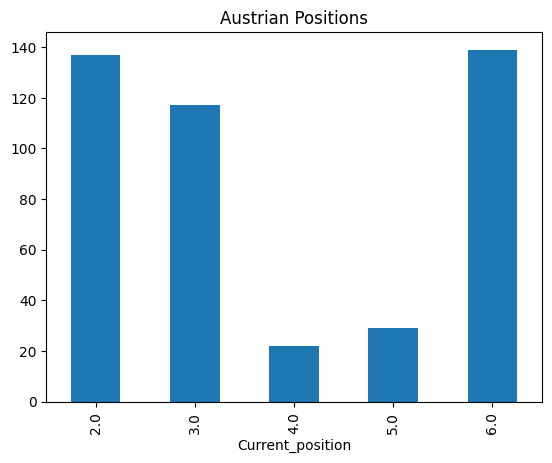

In [28]:
data_at_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar')
plt.title('Austrian Positions')

In [30]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_at_formatted_academic_w_dummies = pd.get_dummies(data_at_formatted_academic, columns = ['Current_position'], drop_first=True) #'Contract_duration', 'Leadership_position'

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.astype(float)

Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col]
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols]

## Calculating the interaction terms for Age moderator:
for col in Working_condition_cols:
  data_at_formatted_academic_w_dummies[col+'_mod_Age'] = data_at_formatted_academic_w_dummies[col] * data_at_formatted_academic_w_dummies['Age']

# data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.drop(['Age_mod_Age'], axis=1)

data_at_formatted_academic_w_dummies.to_csv('data_at_formatted_academic_w_dummies.csv')

print(data_at_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_at_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Job_satisfaction', 'Current_position_3.0', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age']
(444, 22)


##Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'AT Correlation Heatmap')

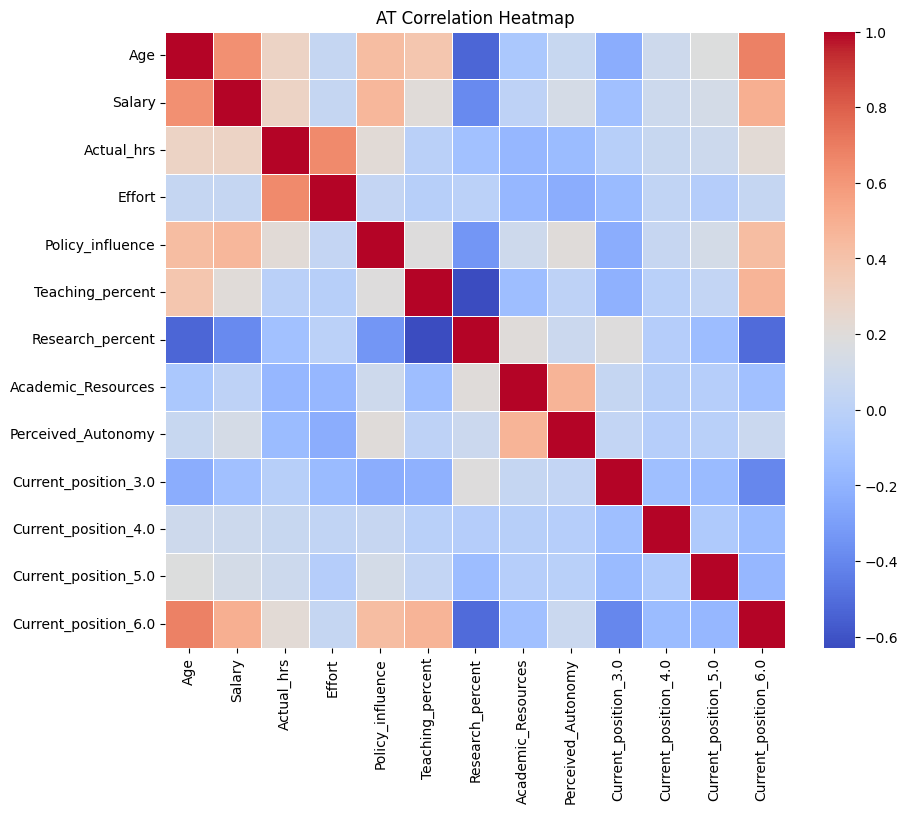

In [31]:
corr_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' not in col and 'Job_satisfaction' not in col]
correlations = data_at_formatted_academic_w_dummies[corr_cols].corr()

plt.figure(figsize=(10, 8)) #, dpi=600)
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('AT Correlation Heatmap')

In [32]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' in col] # and 'Job_satisfaction' not in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols, Moderation_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_at_formatted_academic_w_dummies[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
               Variable       VIF
0                 const  3.240876
1  Current_position_3.0  1.365457
2  Current_position_4.0  1.103078
3  Current_position_5.0  1.132538
4  Current_position_6.0  1.383902
----------------------------------------
Working Conditions:
             Variable        VIF
0               const  92.308276
1              Salary   1.504522
2          Actual_hrs   2.034510
3              Effort   1.853372
4    Policy_influence   1.413630
5    Teaching_percent   1.699600
6    Research_percent   2.053094
7  Academic_Resources   1.374201
8  Perceived_Autonomy   1.418289
----------------------------------------
Age-Moderated Working Conditions:
                     Variable        VIF
0                       const  18.809248
1              Salary_mod_Age   3.412574
2          Actual_hrs_mod_Age   6.865630
3              Effort_mod_Age   7.042506
4    Policy_influence_mod_Age   2.408866
5    Teaching_percent_mod_Age   2.002075
6    Research_percent_mod

In [38]:
data_at_formatted_academic_w_dummies['Job_satisfaction'].unique()

array([3.4       , 3.8       , 4.6       , 2.        , 4.2       ,
       3.        , 2.2       , 3.6       , 2.4       , 4.        ,
       3.2       , 2.6       , 1.8       , 4.4       , 4.8       ,
       2.8       , 4.25714286, 1.        , 4.15      , 5.        ,
       1.4       , 1.2       , 1.6       , 3.4540146 , 3.5459854 ,
       3.18928571])

## Calculating Cronbach's Alpha for the combined factors:

In [39]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [53]:
## Academic Resources:

data_at_for_alpha_academic = data_at_job_w_inversion[(data_at_job_w_inversion['Current_position'].isin([2., 3., 4., 5., 6., 7., 8., 9.]))] # &
                                                    #  (data_at_job_w_inversion['Contract_duration']<6) &
                                                    #  (data_at_job_w_inversion['Leadership_position']<4)].dropna()
## Performing inversion:
# data_at_for_alpha_academic['Current_position'] = 11. - data_at_for_alpha_academic['Current_position']

print(len(data_at_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_at_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_at_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

# leadership_quality_for_alpha = np.asarray(data_at_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']])

# sense_of_community_for_alpha = np.asarray(data_at_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_at_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']].dropna())


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
# lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
# sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





445
Academic Resources Cronbach Alpha: 0.7762949478533535
Perceived Autonomy Cronbach Alpha: 0.873410366616401
---------------------
Job Satisfaction Cronbach Alpha: 0.7603269724102166


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [54]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']
Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' in col and 'Actual_hrs' not in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Actual_hrs' not in col and
                          col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Effort',
 'Policy_influence',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy']

In [55]:
Current_position_dummy_cols

['Current_position_3.0',
 'Current_position_4.0',
 'Current_position_5.0',
 'Current_position_6.0']

In [56]:
Moderation_cols

['Salary_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age']

In [57]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

path_no_mod = f"""
Salary ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors}
"""



path = f"""
Salary ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""


In [58]:
model = semopy.Model(path)
result = model.fit(data_at_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 17.624
Number of iterations: 183
Params: 5.333 11.451 12.319 15.230 -8.963 0.057 -5.696 -1.926 0.070 0.798 1.033 1.228 1.479 7.684 11.080 23.055 -7.709 -18.923 -29.013 -33.667 -0.053 -0.190 -0.197 -0.264 0.181 0.025 0.082 0.228 0.025 -0.007 -0.018 0.002 0.014 0.305 0.305 -0.073 0.294 0.198 0.325 -0.000 0.000 0.002 -0.000 -0.000 0.001 0.002 0.555 412.875 0.261 0.824 0.964 361.552 67.253 322.265


In [59]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF              136.000000
DoF Baseline     182.000000
chi2            7824.886501
chi2 p-value       0.000000
chi2 Baseline  11399.129278
CFI                0.314541
GFI                0.313554
AGFI               0.081374
NFI                0.313554
TLI                0.082694
RMSEA              0.357240
AIC               72.752764
BIC              293.927290
LogLik            17.623618
-------------------------


In [60]:
ins = model.inspect()
print(ins)
ins.to_csv('AT_Model_Parameter_Values.csv')

                  lval  op                        rval    Estimate   Std. Err  \
0               Salary   ~        Current_position_3.0    5.332881   1.032329   
1               Salary   ~        Current_position_4.0   11.450668   1.883569   
2               Salary   ~        Current_position_5.0   12.319275   1.676291   
3               Salary   ~        Current_position_6.0   15.230467   0.987282   
4               Effort   ~        Current_position_3.0   -8.963151   2.557837   
5               Effort   ~        Current_position_4.0    0.057485   4.666982   
6               Effort   ~        Current_position_5.0   -5.696076   4.153402   
7               Effort   ~        Current_position_6.0   -1.926395   2.446223   
8     Policy_influence   ~        Current_position_3.0    0.069551   0.123584   
9     Policy_influence   ~        Current_position_4.0    0.797565   0.225489   
10    Policy_influence   ~        Current_position_5.0    1.032807   0.200675   
11    Policy_influence   ~  

In [61]:
ins[ins['p-value']<0.05]

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Salary,~,Current_position_3.0,5.332881,1.032329,5.165872,2.393200e-07
1,Salary,~,Current_position_4.0,11.450668,1.883569,6.079241,1.207531e-09
2,Salary,~,Current_position_5.0,12.319275,1.676291,7.349128,1.993961e-13
3,Salary,~,Current_position_6.0,15.230467,0.987282,15.426656,0.000000e+00
4,Effort,~,Current_position_3.0,-8.963151,2.557837,-3.504192,4.579955e-04
9,Policy_influence,~,Current_position_4.0,0.797565,0.225489,3.537039,4.046405e-04
10,Policy_influence,~,Current_position_5.0,1.032807,0.200675,5.146657,2.651693e-07
11,Policy_influence,~,Current_position_6.0,1.227929,0.118191,10.389317,0.000000e+00
14,Teaching_percent,~,Current_position_5.0,11.080062,3.669451,3.019542,2.531570e-03
15,Teaching_percent,~,Current_position_6.0,23.055485,2.161191,10.667953,0.000000e+00


In [62]:
significance = []

for i in range(len(ins)):
  if ins['p-value'].iloc[i] <= 0.001:
    significance.append('***')
  elif 0.001 < ins['p-value'].iloc[i] <= 0.01:
    significance.append('**')
  elif 0.01 < ins['p-value'].iloc[i] <= 0.05:
    significance.append('*')
  else:
    significance.append(' (n.s.)')

ins['Significance'] = significance

ins['Estimate w Significance'] = round(ins['Estimate'],5).astype(str) + ins['Significance']
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value,Significance,Estimate w Significance
0,Salary,~,Current_position_3.0,5.332881,1.032329,5.165872,2.393200e-07,***,5.33288***
1,Salary,~,Current_position_4.0,11.450668,1.883569,6.079241,1.207531e-09,***,11.45067***
2,Salary,~,Current_position_5.0,12.319275,1.676291,7.349128,1.993961e-13,***,12.31927***
3,Salary,~,Current_position_6.0,15.230467,0.987282,15.426656,0.000000e+00,***,15.23047***
4,Effort,~,Current_position_3.0,-8.963151,2.557837,-3.504192,4.579955e-04,***,-8.96315***
5,Effort,~,Current_position_4.0,0.057485,4.666982,0.012317,9.901724e-01,(n.s.),0.05749 (n.s.)
6,Effort,~,Current_position_5.0,-5.696076,4.153402,-1.371424,1.702428e-01,(n.s.),-5.69608 (n.s.)
7,Effort,~,Current_position_6.0,-1.926395,2.446223,-0.787498,4.309905e-01,(n.s.),-1.9264 (n.s.)
8,Policy_influence,~,Current_position_3.0,0.069551,0.123584,0.562784,5.735821e-01,(n.s.),0.06955 (n.s.)
9,Policy_influence,~,Current_position_4.0,0.797565,0.225489,3.537039,4.046405e-04,***,0.79756***


In [63]:
ins

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths



,lval,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
0,Salary,5.33288***,11.45067***,12.31927***,15.23047***
1,Effort,-8.96315***,0.05749 (n.s.),-5.69608 (n.s.),-1.9264 (n.s.)
2,Policy_influence,0.06955 (n.s.),0.79756***,1.03281***,1.22793***
3,Teaching_percent,1.47874 (n.s.),7.68381 (n.s.),11.08006**,23.05548***
4,Research_percent,-7.70905**,-18.9234***,-29.01334***,-33.66694***
5,Academic_Resources,-0.05326 (n.s.),-0.18979 (n.s.),-0.19714 (n.s.),-0.26423**
6,Perceived_Autonomy,0.18124 (n.s.),0.02522 (n.s.),0.08244 (n.s.),0.22773*
7,Job_satisfaction,-0.07309 (n.s.),0.29405*,0.19844 (n.s.),0.32525*


In [64]:
work_cond_paths.set_index('lval').T

lval,Job_satisfaction
Salary,0.02511***
Effort,-0.00733***
Policy_influence,-0.01817 (n.s.)
Teaching_percent,0.00238 (n.s.)
Research_percent,0.01423***
Academic_Resources,0.30513***
Perceived_Autonomy,0.30454***


In [65]:
mod_age_paths.set_index('lval').T

lval,Job_satisfaction
Salary_mod_Age,-0.00044***
Effort_mod_Age,0.00012***
Policy_influence_mod_Age,0.0021***
Teaching_percent_mod_Age,-8e-05*
Research_percent_mod_Age,-0.00035***
Academic_Resources_mod_Age,0.00081 (n.s.)
Perceived_Autonomy_mod_Age,0.00227**


In [66]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    try:
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                        (ins['lval']==work_cond)])* float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
    except:
      path_coeff.append(np.nan)
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &


,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_3.0,0.133929,0.065738,-0.001264,0.003518,-0.109702,-0.016252,0.055193
1,Current_position_4.0,0.287570,-0.000422,-0.014490,0.018280,-0.269286,-0.057911,0.007681
2,Current_position_5.0,0.309384,0.041776,-0.018764,0.026359,-0.412869,-0.060155,0.025107
3,Current_position_6.0,0.382495,0.014129,-0.022309,0.054849,-0.479091,-0.080627,0.069352


## Performing Sobel Test for Mediation Effects

In [67]:
Sobel_z_stat_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_val_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins['Estimate'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins['Std. Err'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins['Std. Err'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z
  Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p

Sobel_z_stat_df

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_3.0,4.4145***,3.0447**,-0.4471 (n.s.),0.6135 (n.s.),-3.0946**,-0.5667 (n.s.),1.5705 (n.s.)
1,Current_position_4.0,4.9446***,-0.0123 (n.s.),-0.7207 (n.s.),1.2805 (n.s.),-4.0395***,-1.1011 (n.s.),0.1209 (n.s.)
2,Current_position_5.0,5.5592***,1.3385 (n.s.),-0.7287 (n.s.),1.5222 (n.s.),-6.2059***,-1.282 (n.s.),0.4439 (n.s.)
3,Current_position_6.0,7.4444***,0.7811 (n.s.),-0.7343 (n.s.),1.7389 (n.s.),-8.8937***,-2.81**,2.0494*


In [68]:
Sobel_z_stat_df.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,4.4145***,4.9446***,5.5592***,7.4444***
Effort,3.0447**,-0.0123 (n.s.),1.3385 (n.s.),0.7811 (n.s.)
Policy_influence,-0.4471 (n.s.),-0.7207 (n.s.),-0.7287 (n.s.),-0.7343 (n.s.)
Teaching_percent,0.6135 (n.s.),1.2805 (n.s.),1.5222 (n.s.),1.7389 (n.s.)
Research_percent,-3.0946**,-4.0395***,-6.2059***,-8.8937***
Academic_Resources,-0.5667 (n.s.),-1.1011 (n.s.),-1.282 (n.s.),-2.81**
Perceived_Autonomy,1.5705 (n.s.),0.1209 (n.s.),0.4439 (n.s.),2.0494*


In [69]:
Sobel_p_val_df.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.000010,7.628664e-07,2.710254e-08,9.740130e-14
Effort,0.002329,9.901724e-01,1.807174e-01,4.347316e-01
Policy_influence,0.654813,4.711189e-01,4.661943e-01,4.627904e-01
Teaching_percent,0.539578,2.003656e-01,1.279679e-01,8.204872e-02
Research_percent,0.001971,5.355651e-05,5.439380e-10,5.911761e-19
Academic_Resources,0.570899,2.708381e-01,1.998312e-01,4.953837e-03
Perceived_Autonomy,0.116296,9.037490e-01,6.571433e-01,4.042271e-02


## Sobel Test for Moderation Effects:

In [70]:
Sobel_z_mod_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_mod_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins['Estimate'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins['Std. Err'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins['Std. Err'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_mod_df.loc[len(Sobel_z_mod_df)] = Sobel_z
  Sobel_p_mod_df.loc[len(Sobel_p_mod_df)] = Sobel_p

Sobel_z_mod_df

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_3.0,-4.1772***,-2.8821**,0.5556 (n.s.),-0.6281 (n.s.),3.0361**,-0.4844 (n.s.),1.4118 (n.s.)
1,Current_position_4.0,-4.6178***,0.0123 (n.s.),2.4839*,-1.4328 (n.s.),3.9119***,-0.712 (n.s.),0.1208 (n.s.)
2,Current_position_5.0,-5.1062***,-1.3238 (n.s.),2.8879**,-1.7995 (n.s.),5.7708***,-0.7545 (n.s.),0.4397 (n.s.)
3,Current_position_6.0,-6.4496***,-0.7782 (n.s.),3.3074***,-2.193*,7.7369***,-0.8857 (n.s.),1.7293 (n.s.)


In [71]:
Sobel_z_mod_df.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,-4.1772***,-4.6178***,-5.1062***,-6.4496***
Effort,-2.8821**,0.0123 (n.s.),-1.3238 (n.s.),-0.7782 (n.s.)
Policy_influence,0.5556 (n.s.),2.4839*,2.8879**,3.3074***
Teaching_percent,-0.6281 (n.s.),-1.4328 (n.s.),-1.7995 (n.s.),-2.193*
Research_percent,3.0361**,3.9119***,5.7708***,7.7369***
Academic_Resources,-0.4844 (n.s.),-0.712 (n.s.),-0.7545 (n.s.),-0.8857 (n.s.)
Perceived_Autonomy,1.4118 (n.s.),0.1208 (n.s.),0.4397 (n.s.),1.7293 (n.s.)


In [72]:
Sobel_p_mod_df.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.000030,0.000004,3.286447e-07,1.121216e-10
Effort,0.003951,0.990172,1.855727e-01,4.364775e-01
Policy_influence,0.578483,0.012997,3.878605e-03,9.417799e-04
Teaching_percent,0.529917,0.151909,7.194642e-02,2.830927e-02
Research_percent,0.002397,0.000092,7.890620e-09,1.018424e-14
Academic_Resources,0.628095,0.476492,4.505342e-01,3.757774e-01
Perceived_Autonomy,0.158017,0.903816,6.601478e-01,8.375383e-02


## Path Modelling with No Moderation:

In [73]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_at_formatted_academic_w_dummies)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.855
Number of iterations: 177
Params: 5.333 11.446 12.321 15.231 -8.965 0.059 -5.695 -1.926 0.070 0.798 1.033 1.228 1.483 7.683 11.076 23.054 -7.710 -18.922 -29.013 -33.667 -0.054 -0.190 -0.197 -0.264 0.181 0.025 0.082 0.228 0.006 -0.002 0.072 -0.001 0.001 0.338 0.398 -0.058 0.329 0.270 0.409 0.555 412.840 0.266 0.824 0.964 361.538 67.251 322.241


In [74]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                     Value
DoF              31.000000
DoF Baseline     70.000000
chi2            379.714621
chi2 p-value      0.000000
chi2 Baseline  1633.014026
CFI               0.776896
GFI               0.767476
AGFI              0.474946
NFI               0.767476
TLI               0.496217
RMSEA             0.159350
AIC              92.289574
BIC             284.793328
LogLik            0.855213
-------------------------


In [75]:
ins_no_mod = model_no_mod.inspect()
print(ins_no_mod)
ins_no_mod.to_csv('AT_No_Mod_Model_Parameter_Values.csv')

                  lval  op                  rval    Estimate   Std. Err  \
0               Salary   ~  Current_position_3.0    5.332792   1.032320   
1               Salary   ~  Current_position_4.0   11.446069   1.883552   
2               Salary   ~  Current_position_5.0   12.321213   1.676275   
3               Salary   ~  Current_position_6.0   15.230861   0.987273   
4               Effort   ~  Current_position_3.0   -8.964811   2.557729   
5               Effort   ~  Current_position_4.0    0.058539   4.666785   
6               Effort   ~  Current_position_5.0   -5.695360   4.153226   
7               Effort   ~  Current_position_6.0   -1.926061   2.446120   
8     Policy_influence   ~  Current_position_3.0    0.069571   0.123585   
9     Policy_influence   ~  Current_position_4.0    0.797614   0.225491   
10    Policy_influence   ~  Current_position_5.0    1.032716   0.200677   
11    Policy_influence   ~  Current_position_6.0    1.227950   0.118192   
12    Teaching_percent   

## Sobel Test for Mediation Effect (No Moderation)

In [76]:
Sobel_z_stat_no_mod  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_val_no_mod  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) & (ins_no_mod['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==curr_pos) & (ins_no_mod['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_stat_no_mod.loc[len(Sobel_z_stat_no_mod)] = Sobel_z
  Sobel_p_val_no_mod.loc[len(Sobel_p_val_no_mod)] = Sobel_p

Sobel_z_stat_no_mod

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_3.0,1.738 (n.s.),1.7748 (n.s.),0.5524 (n.s.),-0.5493 (n.s.),-1.0217 (n.s.),-0.5696 (n.s.),1.5765 (n.s.)
1,Current_position_4.0,1.7659 (n.s.),-0.0125 (n.s.),2.2299*,-0.8844 (n.s.),-1.0454 (n.s.),-1.102 (n.s.),0.1209 (n.s.)
2,Current_position_5.0,1.79 (n.s.),1.1412 (n.s.),2.5083*,-0.9533 (n.s.),-1.0662 (n.s.),-1.2836 (n.s.),0.4439 (n.s.)
3,Current_position_6.0,1.8325 (n.s.),0.7354 (n.s.),2.7687**,-1.0003 (n.s.),-1.0744 (n.s.),-2.8335**,2.0627*


In [77]:
Sobel_z_stat_no_mod.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,1.738 (n.s.),1.7659 (n.s.),1.79 (n.s.),1.8325 (n.s.)
Effort,1.7748 (n.s.),-0.0125 (n.s.),1.1412 (n.s.),0.7354 (n.s.)
Policy_influence,0.5524 (n.s.),2.2299*,2.5083*,2.7687**
Teaching_percent,-0.5493 (n.s.),-0.8844 (n.s.),-0.9533 (n.s.),-1.0003 (n.s.)
Research_percent,-1.0217 (n.s.),-1.0454 (n.s.),-1.0662 (n.s.),-1.0744 (n.s.)
Academic_Resources,-0.5696 (n.s.),-1.102 (n.s.),-1.2836 (n.s.),-2.8335**
Perceived_Autonomy,1.5765 (n.s.),0.1209 (n.s.),0.4439 (n.s.),2.0627*


In [78]:
Sobel_p_val_no_mod.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.082217,0.077412,0.073456,0.066880
Effort,0.075924,0.989992,0.253780,0.462086
Policy_influence,0.580653,0.025754,0.012132,0.005628
Teaching_percent,0.582774,0.376498,0.340443,0.317174
Research_percent,0.306946,0.295822,0.286325,0.282650
Academic_Resources,0.568963,0.270469,0.199279,0.004604
Perceived_Autonomy,0.114917,0.903809,0.657101,0.039137


## Bootstrapping:

In [110]:
times = 2000

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']


mediation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols)
mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  if i % 20 ==0:
    print(f'Run: {i}/{times}')
  data_at_bootstrapped = data_at_formatted_academic_w_dummies.sample(n=len(data_at_formatted_academic_w_dummies), replace=True, random_state=i).reset_index(drop=True)

  # model = semopy.Model(path)
  result = model.fit(data_at_bootstrapped)
  ins = model.inspect()
  # model_no_mod = semopy.Model(path_no_mod)
  result_no_mod = model_no_mod.fit(data_at_bootstrapped)
  ins_no_mod = model_no_mod.inspect()

  if 'Optimization terminated successfully' in result.message and 'Optimization terminated successfully' in result_no_mod.message:
    # print('Optimization Successful')

    ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
    fit_evaluation = semopy.calc_stats(model)
    # print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff = [i, curr_pos]
      mod_coeff = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
        mod_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff = path_coeff + fit_evaluation.iloc[0].tolist()
      mediation_path_values.loc[len(mediation_path_values)] = path_coeff
      moderation_path_values.loc[len(moderation_path_values)] = mod_coeff


    ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    # print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff_no_mod = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']==work_cond)].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod = path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
      mediation_path_values_no_mod.loc[len(mediation_path_values_no_mod)] = path_coeff_no_mod

  else:
    print('Run:', i)
    print('Optimization Unsuccessful')

mediation_path_values

Run: 0/2000
Run: 20/2000
Run: 40/2000
Run: 60/2000
Run: 80/2000
Run: 100/2000
Run: 120/2000
Run: 140/2000
Run: 160/2000
Run: 180/2000
Run: 200/2000
Run: 220/2000
Run: 240/2000
Run: 260/2000
Run: 280/2000
Run: 300/2000
Run: 320/2000
Run: 340/2000
Run: 360/2000
Run: 380/2000
Run: 400/2000
Run: 420/2000
Run: 440/2000
Run: 460/2000
Run: 480/2000
Run: 500/2000
Run: 520/2000
Run: 540/2000
Run: 560/2000
Run: 580/2000
Run: 600/2000
Run: 620/2000
Run: 640/2000
Run: 660/2000
Run: 680/2000
Run: 700/2000
Run: 720/2000
Run: 740/2000
Run: 760/2000
Run: 780/2000
Run: 800/2000
Run: 820/2000
Run: 840/2000
Run: 860/2000
Run: 880/2000
Run: 900/2000
Run: 920/2000
Run: 940/2000
Run: 960/2000
Run: 980/2000
Run: 1000/2000
Run: 1020/2000
Run: 1040/2000
Run: 1060/2000
Run: 1080/2000
Run: 1100/2000
Run: 1120/2000
Run: 1140/2000
Run: 1160/2000
Run: 1180/2000
Run: 1200/2000
Run: 1220/2000
Run: 1240/2000
Run: 1260/2000
Run: 1280/2000
Run: 1300/2000
Run: 1320/2000
Run: 1340/2000
Run: 1360/2000
Run: 1380/2000
Run: 1

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,0.224358,0.032803,-0.004706,-0.001596,-0.079841,0.029157,0.112612,-0.221635,...,11446.126931,0.329559,0.328338,0.101158,0.328338,0.102792,0.354044,73.369681,294.544207,17.315160
1,0,Current_position_4.0,0.395919,0.009823,-0.069820,-0.007869,-0.253391,-0.126824,-0.023064,0.157557,...,11446.126931,0.329559,0.328338,0.101158,0.328338,0.102792,0.354044,73.369681,294.544207,17.315160
2,0,Current_position_5.0,0.503491,0.044343,-0.082316,-0.008049,-0.395465,-0.059690,0.105347,0.290497,...,11446.126931,0.329559,0.328338,0.101158,0.328338,0.102792,0.354044,73.369681,294.544207,17.315160
3,0,Current_position_6.0,0.596178,-0.005668,-0.092679,-0.014540,-0.473845,-0.076132,0.082368,0.352276,...,11446.126931,0.329559,0.328338,0.101158,0.328338,0.102792,0.354044,73.369681,294.544207,17.315160
4,1,Current_position_3.0,0.098286,0.017126,-0.002662,0.016878,-0.140431,-0.069443,0.026659,-0.102442,...,11312.906606,0.275810,0.275439,0.030366,0.275439,0.030863,0.365780,71.077044,292.251570,18.461478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,0.118118,-0.035578,0.078124,-0.075480,-0.446589,-0.092463,0.071066,0.151673,...,11615.832160,0.300039,0.299298,0.062296,0.299298,0.063288,0.364470,71.336785,292.511311,18.331607
7996,1999,Current_position_3.0,0.174307,0.029933,-0.009800,0.003699,-0.045205,0.025769,0.123579,-0.075502,...,11800.039894,0.303434,0.302652,0.066785,0.302652,0.067831,0.366502,70.933641,292.108168,18.533179
7997,1999,Current_position_4.0,0.330214,0.033717,-0.105750,-0.067813,-0.247219,-0.031072,0.108022,0.443393,...,11800.039894,0.303434,0.302652,0.066785,0.302652,0.067831,0.366502,70.933641,292.108168,18.533179
7998,1999,Current_position_5.0,0.505222,0.010586,-0.174820,-0.062808,-0.281238,-0.057301,0.068869,0.392348,...,11800.039894,0.303434,0.302652,0.066785,0.302652,0.067831,0.366502,70.933641,292.108168,18.533179


In [111]:
moderation_path_values

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,0,Current_position_3.0,-0.003198,-0.000228,0.000229,0.000071,0.001833,0.000119,0.000396
1,0,Current_position_4.0,-0.005644,-0.000068,0.003392,0.000349,0.005816,-0.000516,-0.000081
2,0,Current_position_5.0,-0.007178,-0.000308,0.003999,0.000357,0.009078,-0.000243,0.000371
3,0,Current_position_6.0,-0.008499,0.000039,0.004502,0.000646,0.010877,-0.000310,0.000290
4,1,Current_position_3.0,-0.001406,0.000213,0.000075,-0.000357,0.002910,0.000223,0.001606
...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,-0.002529,0.000631,0.001055,0.001224,0.010379,-0.000707,-0.000028
7996,1999,Current_position_3.0,-0.003171,-0.000203,0.000362,-0.000056,0.001122,-0.000039,0.000550
7997,1999,Current_position_4.0,-0.006008,-0.000229,0.003903,0.001020,0.006137,0.000047,0.000481
7998,1999,Current_position_5.0,-0.009192,-0.000072,0.006452,0.000945,0.006981,0.000086,0.000307


In [112]:
mediation_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,0.069018,0.022993,0.004651,0.001413,-0.014317,0.034033,0.131191,-0.239103,...,1673.524289,0.770588,0.761660,0.461813,0.761660,0.481973,0.163668,92.203299,284.707053,0.898351
1,0,Current_position_4.0,0.121787,0.006850,0.069131,0.006947,-0.045456,-0.147823,-0.026851,0.105400,...,1673.524289,0.770588,0.761660,0.461813,0.761660,0.481973,0.163668,92.203299,284.707053,0.898351
2,0,Current_position_5.0,0.154894,0.031098,0.081507,0.007116,-0.070946,-0.069600,0.122715,0.272083,...,1673.524289,0.770588,0.761660,0.461813,0.761660,0.481973,0.163668,92.203299,284.707053,0.898351
3,0,Current_position_6.0,0.183402,-0.003974,0.091761,0.012860,-0.084992,-0.088699,0.095956,0.314812,...,1673.524289,0.770588,0.761660,0.461813,0.761660,0.481973,0.163668,92.203299,284.707053,0.898351
4,1,Current_position_3.0,0.032495,0.027245,0.000495,0.000876,-0.030464,-0.062715,0.094141,-0.119236,...,1563.700004,0.754827,0.745977,0.426400,0.745977,0.446383,0.163300,92.210742,284.714497,0.894629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,0.033967,-0.010345,0.118201,-0.049468,-0.055082,-0.134232,0.069250,0.425906,...,1665.673205,0.768572,0.759687,0.457357,0.759687,0.477421,0.163982,92.196922,284.700676,0.901539
7996,1999,Current_position_3.0,0.028590,0.024235,0.004796,0.001962,-0.006442,0.023940,0.146679,-0.104455,...,1750.558373,0.735169,0.728050,0.385920,0.728050,0.401995,0.180023,91.855568,284.359323,1.072216
7997,1999,Current_position_4.0,0.054088,0.026580,0.051762,-0.034798,-0.036661,-0.028860,0.128199,0.400454,...,1750.558373,0.735169,0.728050,0.385920,0.728050,0.401995,0.180023,91.855568,284.359323,1.072216
7998,1999,Current_position_5.0,0.082886,0.008615,0.085583,-0.032266,-0.041144,-0.053232,0.081736,0.365403,...,1750.558373,0.735169,0.728050,0.385920,0.728050,0.401995,0.180023,91.855568,284.359323,1.072216


In [113]:
mediation_path_values.to_csv('AT_mediation_path_values.csv')
moderation_path_values.to_csv('AT_moderation_path_values.csv')
mediation_path_values_no_mod.to_csv('AT_mediation_path_values_no_mod.csv')

In [ ]:
# path_to_bootstrap = 'https://raw.githubusercontent.com/AndreiAf02/Job-Satisfaction/refs/heads/main/AT_bootstrap/'

# mediation_path_values = pd.read_csv(path_to_bootstrap+'AT_mediation_path_values.csv', sep=",", header=0).iloc[:,1:]
# moderation_path_values = pd.read_csv(path_to_bootstrap+'AT_moderation_path_values.csv', sep=",", header=0).iloc[:,1:]
# mediation_path_values_no_mod = pd.read_csv(path_to_bootstrap+'AT_mediation_path_values_no_mod.csv', sep=",", header=0).iloc[:,1:]

In [114]:
mediation_path_values

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,0.224358,0.032803,-0.004706,-0.001596,-0.079841,0.029157,0.112612,-0.221635,...,11446.126931,0.329559,0.328338,0.101158,0.328338,0.102792,0.354044,73.369681,294.544207,17.315160
1,0,Current_position_4.0,0.395919,0.009823,-0.069820,-0.007869,-0.253391,-0.126824,-0.023064,0.157557,...,11446.126931,0.329559,0.328338,0.101158,0.328338,0.102792,0.354044,73.369681,294.544207,17.315160
2,0,Current_position_5.0,0.503491,0.044343,-0.082316,-0.008049,-0.395465,-0.059690,0.105347,0.290497,...,11446.126931,0.329559,0.328338,0.101158,0.328338,0.102792,0.354044,73.369681,294.544207,17.315160
3,0,Current_position_6.0,0.596178,-0.005668,-0.092679,-0.014540,-0.473845,-0.076132,0.082368,0.352276,...,11446.126931,0.329559,0.328338,0.101158,0.328338,0.102792,0.354044,73.369681,294.544207,17.315160
4,1,Current_position_3.0,0.098286,0.017126,-0.002662,0.016878,-0.140431,-0.069443,0.026659,-0.102442,...,11312.906606,0.275810,0.275439,0.030366,0.275439,0.030863,0.365780,71.077044,292.251570,18.461478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,0.118118,-0.035578,0.078124,-0.075480,-0.446589,-0.092463,0.071066,0.151673,...,11615.832160,0.300039,0.299298,0.062296,0.299298,0.063288,0.364470,71.336785,292.511311,18.331607
7996,1999,Current_position_3.0,0.174307,0.029933,-0.009800,0.003699,-0.045205,0.025769,0.123579,-0.075502,...,11800.039894,0.303434,0.302652,0.066785,0.302652,0.067831,0.366502,70.933641,292.108168,18.533179
7997,1999,Current_position_4.0,0.330214,0.033717,-0.105750,-0.067813,-0.247219,-0.031072,0.108022,0.443393,...,11800.039894,0.303434,0.302652,0.066785,0.302652,0.067831,0.366502,70.933641,292.108168,18.533179
7998,1999,Current_position_5.0,0.505222,0.010586,-0.174820,-0.062808,-0.281238,-0.057301,0.068869,0.392348,...,11800.039894,0.303434,0.302652,0.066785,0.302652,0.067831,0.366502,70.933641,292.108168,18.533179


In [115]:
moderation_path_values

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,0,Current_position_3.0,-0.003198,-0.000228,0.000229,0.000071,0.001833,0.000119,0.000396
1,0,Current_position_4.0,-0.005644,-0.000068,0.003392,0.000349,0.005816,-0.000516,-0.000081
2,0,Current_position_5.0,-0.007178,-0.000308,0.003999,0.000357,0.009078,-0.000243,0.000371
3,0,Current_position_6.0,-0.008499,0.000039,0.004502,0.000646,0.010877,-0.000310,0.000290
4,1,Current_position_3.0,-0.001406,0.000213,0.000075,-0.000357,0.002910,0.000223,0.001606
...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,-0.002529,0.000631,0.001055,0.001224,0.010379,-0.000707,-0.000028
7996,1999,Current_position_3.0,-0.003171,-0.000203,0.000362,-0.000056,0.001122,-0.000039,0.000550
7997,1999,Current_position_4.0,-0.006008,-0.000229,0.003903,0.001020,0.006137,0.000047,0.000481
7998,1999,Current_position_5.0,-0.009192,-0.000072,0.006452,0.000945,0.006981,0.000086,0.000307


In [116]:
mediation_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,0.069018,0.022993,0.004651,0.001413,-0.014317,0.034033,0.131191,-0.239103,...,1673.524289,0.770588,0.761660,0.461813,0.761660,0.481973,0.163668,92.203299,284.707053,0.898351
1,0,Current_position_4.0,0.121787,0.006850,0.069131,0.006947,-0.045456,-0.147823,-0.026851,0.105400,...,1673.524289,0.770588,0.761660,0.461813,0.761660,0.481973,0.163668,92.203299,284.707053,0.898351
2,0,Current_position_5.0,0.154894,0.031098,0.081507,0.007116,-0.070946,-0.069600,0.122715,0.272083,...,1673.524289,0.770588,0.761660,0.461813,0.761660,0.481973,0.163668,92.203299,284.707053,0.898351
3,0,Current_position_6.0,0.183402,-0.003974,0.091761,0.012860,-0.084992,-0.088699,0.095956,0.314812,...,1673.524289,0.770588,0.761660,0.461813,0.761660,0.481973,0.163668,92.203299,284.707053,0.898351
4,1,Current_position_3.0,0.032495,0.027245,0.000495,0.000876,-0.030464,-0.062715,0.094141,-0.119236,...,1563.700004,0.754827,0.745977,0.426400,0.745977,0.446383,0.163300,92.210742,284.714497,0.894629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,0.033967,-0.010345,0.118201,-0.049468,-0.055082,-0.134232,0.069250,0.425906,...,1665.673205,0.768572,0.759687,0.457357,0.759687,0.477421,0.163982,92.196922,284.700676,0.901539
7996,1999,Current_position_3.0,0.028590,0.024235,0.004796,0.001962,-0.006442,0.023940,0.146679,-0.104455,...,1750.558373,0.735169,0.728050,0.385920,0.728050,0.401995,0.180023,91.855568,284.359323,1.072216
7997,1999,Current_position_4.0,0.054088,0.026580,0.051762,-0.034798,-0.036661,-0.028860,0.128199,0.400454,...,1750.558373,0.735169,0.728050,0.385920,0.728050,0.401995,0.180023,91.855568,284.359323,1.072216
7998,1999,Current_position_5.0,0.082886,0.008615,0.085583,-0.032266,-0.041144,-0.053232,0.081736,0.365403,...,1750.558373,0.735169,0.728050,0.385920,0.728050,0.401995,0.180023,91.855568,284.359323,1.072216


##Analyzing the bootstrap results:

In [117]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
lbound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
ubound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
pbci_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
pbci_90_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])

for curr_pos in Current_position_dummy_cols:
  data = mediation_path_values[mediation_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  lbound_vals = [curr_pos]
  ubound_vals = [curr_pos]
  pbci_vals = [curr_pos]
  pbci_90_vals = [curr_pos]

  for col in data[Working_condition_cols+['Job_satisfaction']]:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']')
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95),4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals
  pbci_90_results.loc[len(pbci_90_results)] = pbci_90_vals



mean_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_3.0,0.132162,0.066685,-0.002435,0.003379,-0.106210,-0.016095,0.055775,-0.072510
1,Current_position_4.0,0.281809,0.002477,-0.014695,0.023610,-0.273466,-0.060059,0.007038,0.304424
2,Current_position_5.0,0.303992,0.043119,-0.019051,0.030036,-0.409033,-0.060515,0.025861,0.203327
3,Current_position_6.0,0.375128,0.014141,-0.023927,0.062165,-0.479346,-0.082747,0.068241,0.332215


In [118]:
lbound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_3.0,0.003472,-0.005918,-0.037190,-0.028212,-0.224789,-0.083189,-0.017672,-0.227050
1,Current_position_4.0,0.009753,-0.096838,-0.210586,-0.078358,-0.531670,-0.206653,-0.131333,0.039850
2,Current_position_5.0,0.009723,-0.021236,-0.265585,-0.113071,-0.686515,-0.170059,-0.086096,-0.042408
3,Current_position_6.0,0.011013,-0.024624,-0.318915,-0.216853,-0.797151,-0.190132,-0.003243,0.114831


In [119]:
ubound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_3.0,0.278211,0.160223,0.025781,0.042010,-0.019981,0.042355,0.157195,0.077603
1,Current_position_4.0,0.579914,0.102856,0.174569,0.152565,-0.079172,0.047680,0.158128,0.577117
2,Current_position_5.0,0.624751,0.146245,0.207748,0.169839,-0.146982,0.011803,0.154448,0.460519
3,Current_position_6.0,0.743178,0.071900,0.243407,0.340379,-0.169026,-0.009415,0.171802,0.542013


In [120]:
pbci_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_3.0,"[0.0035, 0.2782]","[-0.0059, 0.1602]","[-0.0372, 0.0258]","[-0.0282, 0.042]","[-0.2248, -0.02]","[-0.0832, 0.0424]","[-0.0177, 0.1572]","[-0.2271, 0.0776]"
1,Current_position_4.0,"[0.0098, 0.5799]","[-0.0968, 0.1029]","[-0.2106, 0.1746]","[-0.0784, 0.1526]","[-0.5317, -0.0792]","[-0.2067, 0.0477]","[-0.1313, 0.1581]","[0.0399, 0.5771]"
2,Current_position_5.0,"[0.0097, 0.6248]","[-0.0212, 0.1462]","[-0.2656, 0.2077]","[-0.1131, 0.1698]","[-0.6865, -0.147]","[-0.1701, 0.0118]","[-0.0861, 0.1544]","[-0.0424, 0.4605]"
3,Current_position_6.0,"[0.011, 0.7432]","[-0.0246, 0.0719]","[-0.3189, 0.2434]","[-0.2169, 0.3404]","[-0.7972, -0.169]","[-0.1901, -0.0094]","[-0.0032, 0.1718]","[0.1148, 0.542]"


In [121]:
pbci_90_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_3.0,"[0.0205, 0.2463]","[0.0052, 0.1415]","[-0.0278, 0.0182]","[-0.0202, 0.0315]","[-0.2023, -0.0296]","[-0.0695, 0.0301]","[-0.004, 0.1369]","[-0.2003, 0.0532]"
1,Current_position_4.0,"[0.0442, 0.5334]","[-0.0736, 0.0809]","[-0.1781, 0.1363]","[-0.0549, 0.1305]","[-0.4887, -0.1056]","[-0.1731, 0.0261]","[-0.1002, 0.1285]","[0.0745, 0.539]"
2,Current_position_5.0,"[0.0475, 0.5648]","[-0.0105, 0.1245]","[-0.223, 0.1694]","[-0.0882, 0.1461]","[-0.6508, -0.1849]","[-0.1467, 0.0007]","[-0.0654, 0.1254]","[-0.01, 0.4147]"
3,Current_position_6.0,"[0.0592, 0.6775]","[-0.017, 0.0586]","[-0.2652, 0.1952]","[-0.1719, 0.2889]","[-0.7491, -0.2231]","[-0.1691, -0.0162]","[0.0067, 0.1504]","[0.1504, 0.5084]"


In [122]:
mod_mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_lbound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_ubound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_pbci_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_pbci_90_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  data = moderation_path_values[moderation_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  lbound_vals = [curr_pos]
  ubound_vals = [curr_pos]
  pbci_vals = [curr_pos]
  pbci_90_vals = [curr_pos]

  for col in Working_condition_cols:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']')
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95.),4))+']')

  mod_mean_results.loc[len(mod_mean_results)] = mean_vals
  mod_lbound_results.loc[len(mod_lbound_results)] = lbound_vals
  mod_ubound_results.loc[len(mod_ubound_results)] = ubound_vals
  mod_pbci_results.loc[len(mod_pbci_results)] = pbci_vals
  mod_pbci_90_results.loc[len(mod_pbci_90_results)] = pbci_90_vals



mod_mean_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_3.0,-0.002352,-0.001092,0.000174,-0.000120,0.002594,-0.000044,0.000411
1,Current_position_4.0,-0.005023,-0.000049,0.001722,-0.000745,0.006691,-0.000156,-0.000026
2,Current_position_5.0,-0.005405,-0.000707,0.002166,-0.000974,0.009986,-0.000147,0.000187
3,Current_position_6.0,-0.006678,-0.000235,0.002627,-0.001988,0.011708,-0.000192,0.000527


In [123]:
mod_lbound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_3.0,-0.005240,-0.003135,-0.000444,-0.001040,0.000447,-0.000819,-0.000783
1,Current_position_4.0,-0.010923,-0.002034,-0.002119,-0.003850,0.001632,-0.002053,-0.001654
2,Current_position_5.0,-0.011726,-0.002827,-0.002711,-0.004247,0.003135,-0.001614,-0.001101
3,Current_position_6.0,-0.013876,-0.001396,-0.003312,-0.008311,0.003620,-0.001942,-0.000794


In [124]:
mod_ubound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_3.0,0.000172,0.000442,0.001173,0.000584,0.005511,0.000581,0.001975
1,Current_position_4.0,0.000390,0.001678,0.006502,0.001410,0.013190,0.001443,0.001576
2,Current_position_5.0,0.000421,0.000520,0.007755,0.002390,0.016826,0.001226,0.001893
3,Current_position_6.0,0.000468,0.000445,0.009071,0.004585,0.019717,0.001517,0.002309


In [125]:
mod_pbci_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Current_position_3.0,"[-0.0052, 0.0002]","[-0.0031, 0.0004]","[-0.0004, 0.0012]","[-0.001, 0.0006]","[0.0004, 0.0055]","[-0.0008, 0.0006]","[-0.0008, 0.002]"
1,Current_position_4.0,"[-0.0109, 0.0004]","[-0.002, 0.0017]","[-0.0021, 0.0065]","[-0.0039, 0.0014]","[0.0016, 0.0132]","[-0.0021, 0.0014]","[-0.0017, 0.0016]"
2,Current_position_5.0,"[-0.0117, 0.0004]","[-0.0028, 0.0005]","[-0.0027, 0.0078]","[-0.0042, 0.0024]","[0.0031, 0.0168]","[-0.0016, 0.0012]","[-0.0011, 0.0019]"
3,Current_position_6.0,"[-0.0139, 0.0005]","[-0.0014, 0.0004]","[-0.0033, 0.0091]","[-0.0083, 0.0046]","[0.0036, 0.0197]","[-0.0019, 0.0015]","[-0.0008, 0.0023]"


In [126]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
lbound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
ubound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
pbci_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
pbci_90_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])

for curr_pos in Current_position_dummy_cols:
  data = mediation_path_values_no_mod[mediation_path_values_no_mod['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  lbound_vals = [curr_pos]
  ubound_vals = [curr_pos]
  pbci_vals = [curr_pos]
  pbci_90_vals = [curr_pos]

  for col in data[Working_condition_cols+['Job_satisfaction']]:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']')
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95),4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals
  pbci_90_results.loc[len(pbci_90_results)] = pbci_90_vals



mean_results


,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_3.0,0.028638,0.021994,0.004982,-0.002234,-0.010347,-0.017875,0.072702,-0.057968
1,Current_position_4.0,0.060962,0.000517,0.058696,-0.010995,-0.026335,-0.066534,0.006010,0.332649
2,Current_position_5.0,0.066259,0.014155,0.073623,-0.015748,-0.040143,-0.066620,0.033545,0.271791
3,Current_position_6.0,0.081278,0.004581,0.088364,-0.031215,-0.046894,-0.090830,0.089949,0.412073


In [127]:
lbound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_3.0,-0.002560,-0.000809,-0.010463,-0.016467,-0.040438,-0.076224,-0.019558,-0.192326
1,Current_position_4.0,-0.005133,-0.034692,0.008467,-0.053569,-0.091477,-0.188976,-0.157055,0.086376
2,Current_position_5.0,-0.006150,-0.007302,0.014446,-0.061753,-0.131688,-0.150252,-0.105647,0.057098
3,Current_position_6.0,-0.007006,-0.008749,0.017286,-0.116141,-0.152309,-0.155262,0.002392,0.238220


In [128]:
ubound_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_3.0,0.062895,0.050802,0.022742,0.007066,0.012809,0.043002,0.157463,0.075059
1,Current_position_4.0,0.136643,0.031679,0.127492,0.018982,0.030471,0.053652,0.181310,0.593257
2,Current_position_5.0,0.146936,0.045498,0.140001,0.025923,0.048293,0.010160,0.167200,0.497245
3,Current_position_6.0,0.170517,0.023634,0.159978,0.057250,0.054970,-0.027175,0.178162,0.591203


In [129]:
pbci_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_3.0,"[-0.0026, 0.0629]","[-0.0008, 0.0508]","[-0.0105, 0.0227]","[-0.0165, 0.0071]","[-0.0404, 0.0128]","[-0.0762, 0.043]","[-0.0196, 0.1575]","[-0.1923, 0.0751]"
1,Current_position_4.0,"[-0.0051, 0.1366]","[-0.0347, 0.0317]","[0.0085, 0.1275]","[-0.0536, 0.019]","[-0.0915, 0.0305]","[-0.189, 0.0537]","[-0.1571, 0.1813]","[0.0864, 0.5933]"
2,Current_position_5.0,"[-0.0061, 0.1469]","[-0.0073, 0.0455]","[0.0144, 0.14]","[-0.0618, 0.0259]","[-0.1317, 0.0483]","[-0.1503, 0.0102]","[-0.1056, 0.1672]","[0.0571, 0.4972]"
3,Current_position_6.0,"[-0.007, 0.1705]","[-0.0087, 0.0236]","[0.0173, 0.16]","[-0.1161, 0.0573]","[-0.1523, 0.055]","[-0.1553, -0.0272]","[0.0024, 0.1782]","[0.2382, 0.5912]"


In [130]:
pbci_90_results

,Current_Position,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,Current_position_3.0,"[0.0021, 0.058]","[0.0022, 0.0454]","[-0.008, 0.0196]","[-0.0129, 0.0053]","[-0.0344, 0.0089]","[-0.0674, 0.0321]","[-0.003, 0.1456]","[-0.1715, 0.0524]"
1,Current_position_4.0,"[0.0047, 0.1191]","[-0.0261, 0.0251]","[0.0136, 0.1138]","[-0.045, 0.0126]","[-0.0807, 0.0214]","[-0.172, 0.0336]","[-0.131, 0.1467]","[0.1236, 0.5511]"
2,Current_position_5.0,"[0.005, 0.1293]","[-0.0038, 0.0395]","[0.0233, 0.1285]","[-0.054, 0.0197]","[-0.1168, 0.0329]","[-0.1342, -0.0017]","[-0.0833, 0.1453]","[0.0883, 0.4593]"
3,Current_position_6.0,"[0.0063, 0.1548]","[-0.0058, 0.0187]","[0.0289, 0.1472]","[-0.1013, 0.0408]","[-0.1365, 0.0388]","[-0.1464, -0.037]","[0.0167, 0.1641]","[0.2651, 0.5622]"
